In [1]:
from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from rbm_cuda import RestrictedBoltzmanMachine, DeepBeliefNetwork
import cudamat as cm

%matplotlib inline

# Initialize CUDA
cm.cublas_init()
cm.CUDAMatrix.init_random(1)

In [2]:
# load training data data
X = np.load("input/mnist.npy")

# Load data into GPU (it needs to be (n_features, n_samples) shape, so we save the transposition)
Xc = cm.CUDAMatrix(X.T)

In [3]:
# Create a Deep Belief Network with 6 layers of Restricted Boltzman Machines
dbn = DeepBeliefNetwork([ RestrictedBoltzmanMachine(512, title="layer-1", n_epochs=50, batch_size=1000, momentum=.1),
                          RestrictedBoltzmanMachine(512, title="layer-2", n_epochs=50, batch_size=1000, momentum=.3),
                          RestrictedBoltzmanMachine(128, title="layer-3", n_epochs=50, batch_size=1000, momentum=.4),
                          RestrictedBoltzmanMachine(128, title="layer-4", n_epochs=50, batch_size=1000, momentum=.5),
                          RestrictedBoltzmanMachine(64 , title="layer-5", n_epochs=50, batch_size=1000, momentum=.6),
                          RestrictedBoltzmanMachine(64 , title="layer-6", n_epochs=50, batch_size=1000, momentum=.8),
                        ])

# Train the network with the data
dbn.fit(Xc)

layer-1
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 9.801 sec
layer-2
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 6.510 sec
layer-3
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 2.803 sec
layer-4
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 1.860 sec
layer-5
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 1.607 sec
layer-6
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 1.418 sec


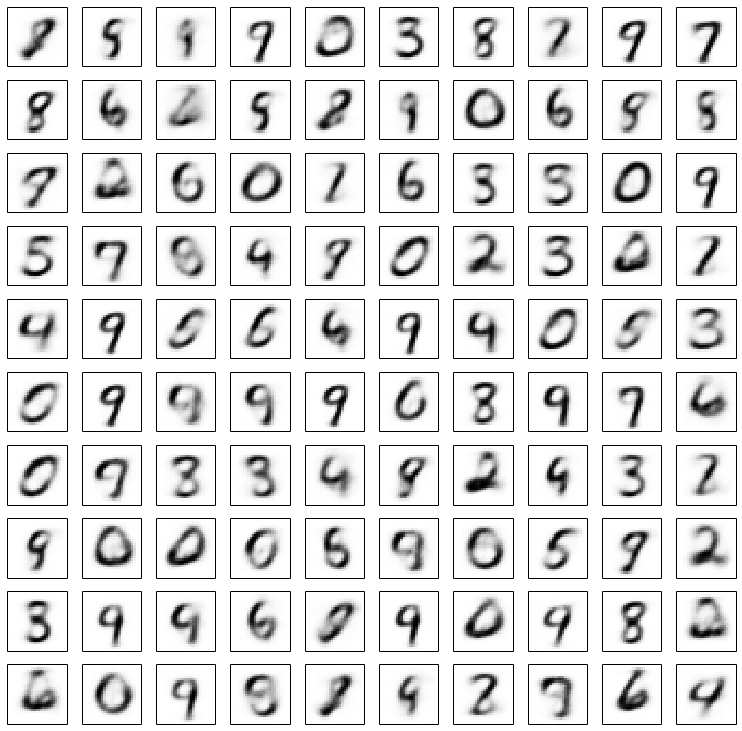

In [4]:
# Plot 100 generated data from the network

plt.figure(figsize=(12.2, 12))
for i in xrange(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(dbn.dream(k=50).asarray().reshape((28, 28)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()

In [5]:
# shutdown CUDA
cm.cublas_shutdown()